In [ ]:
! pip install kagglehub
! pip install numpy pandas matplotlib scikit-learn opencv-python tqdm seaborn

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bhavikjikadara/dog-and-cat-classification-dataset")

print("Path to dataset files:", path)

In [2]:
import os
import cv2
from glob import glob
import numpy as np
from sklearn.model_selection import train_test_split

# 📁 Путь к датасету
dataset_path = r"C:\Users\taifun\.cache\kagglehub\datasets\bhavikjikadara\dog-and-cat-classification-dataset\versions\1\PetImages"

# Проверяем наличие папок
cat_dir = os.path.join(dataset_path, "Cat")
dog_dir = os.path.join(dataset_path, "Dog")

print("Путь к кошкам:", cat_dir)
print("Путь к собакам:", dog_dir)

# Список всех файлов
all_cat_files = glob(os.path.join(cat_dir, "*.jpg"))
all_dog_files = glob(os.path.join(dog_dir, "*.jpg"))

print("\nВсего найдено изображений:")
print(f"Кошки: {len(all_cat_files)}")
print(f"Собаки: {len(all_dog_files)}")

img_size = 64

# Функция для загрузки изображений с фильтрацией повреждённых
def load_images(files, label, img_size=64, limit=1000):
    X = []
    y = []
    for f in files:
        img = cv2.imread(f)
        if img is None:
            print(f"Пропущено (проблема с чтением): {f}")
            continue
        try:
            img = cv2.resize(img, (img_size, img_size))
            X.append(img.flatten())
            y.append(label)
            if len(X) >= limit:
                break  # Останавливаемся после достижения лимита
        except Exception as e:
            print(f"Ошибка обработки файла {f}: {e}")
    return np.array(X), np.array(y)

# Загружаем по 1000 изображений (или сколько удастся)
print("\nЗагрузка и фильтрация изображений...")

X_cats, y_cats = load_images(all_cat_files, label=0, img_size=64, limit=1000)
X_dogs, y_dogs = load_images(all_dog_files, label=1, img_size=64, limit=1000)

# Информация о результатах загрузки
print("\nУспешно загружено:")
print(f"Кошек: {len(X_cats)} изображений")
print(f"Собак: {len(X_dogs)} изображений")

# Объединение выборок
X = np.vstack((X_cats, X_dogs))
y = np.hstack((y_cats, y_dogs))

# Нормализация
X = X / 255.0

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nРазмеры выборок после разделения:")
print(f"Train: {X_train.shape[0]} образцов")
print(f"Test: {X_test.shape[0]} образцов")

Путь к кошкам: C:\Users\taifun\.cache\kagglehub\datasets\bhavikjikadara\dog-and-cat-classification-dataset\versions\1\PetImages\Cat
Путь к собакам: C:\Users\taifun\.cache\kagglehub\datasets\bhavikjikadara\dog-and-cat-classification-dataset\versions\1\PetImages\Dog

Всего найдено изображений:
Кошки: 12499
Собаки: 12499

Загрузка и фильтрация изображений...
Пропущено (проблема с чтением): C:\Users\taifun\.cache\kagglehub\datasets\bhavikjikadara\dog-and-cat-classification-dataset\versions\1\PetImages\Cat\10125.jpg
Пропущено (проблема с чтением): C:\Users\taifun\.cache\kagglehub\datasets\bhavikjikadara\dog-and-cat-classification-dataset\versions\1\PetImages\Cat\10404.jpg
Пропущено (проблема с чтением): C:\Users\taifun\.cache\kagglehub\datasets\bhavikjikadara\dog-and-cat-classification-dataset\versions\1\PetImages\Cat\10501.jpg
Пропущено (проблема с чтением): C:\Users\taifun\.cache\kagglehub\datasets\bhavikjikadara\dog-and-cat-classification-dataset\versions\1\PetImages\Cat\10820.jpg
Пропущ

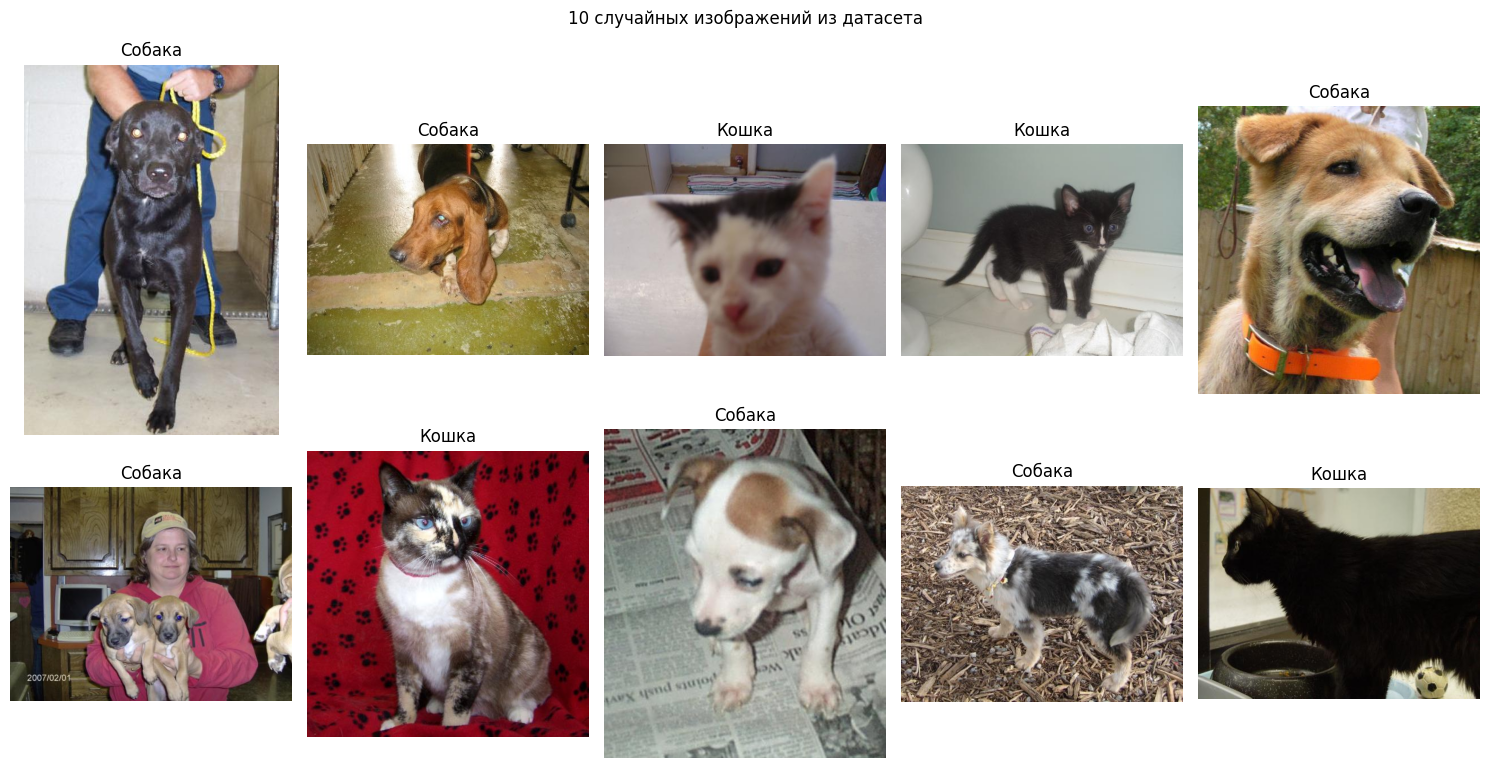

In [3]:
import os
import cv2
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import random

# Путь к датасету
dataset_path = r"C:\Users\taifun\.cache\kagglehub\datasets\bhavikjikadara\dog-and-cat-classification-dataset\versions\1\PetImages"

# Собираем все файлы
cat_files = glob(os.path.join(dataset_path, "Cat", "*.jpg"))
dog_files = glob(os.path.join(dataset_path, "Dog", "*.jpg"))

all_files = cat_files + dog_files

# Выбираем случайные 10 изображений
random.shuffle(all_files)
sample_files = all_files[:10]

# Загружаем и отображаем изображения
plt.figure(figsize=(15, 8))
for i, img_path in enumerate(sample_files):
    img = cv2.imread(img_path)
    if img is None:
        print(f"Не удалось прочитать: {img_path}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # конвертируем в RGB для корректного отображения
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title("Кошка" if "Cat" in img_path else "Собака")
    plt.axis('off')

plt.suptitle("10 случайных изображений из датасета")
plt.tight_layout()
plt.show()

### Обучение модели без РСА

Accuracy: 0.5950

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.62      0.60       199
           1       0.60      0.57      0.58       201

    accuracy                           0.59       400
   macro avg       0.60      0.60      0.59       400
weighted avg       0.60      0.59      0.59       400



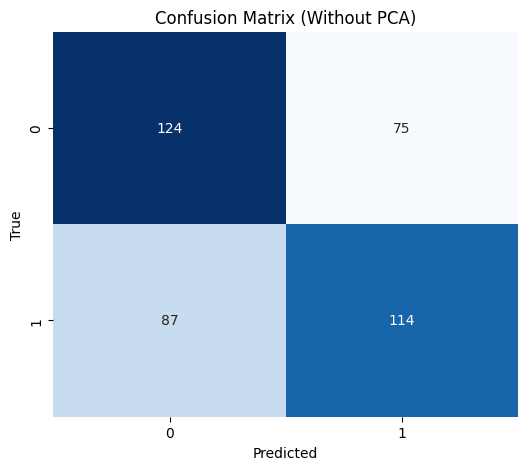

In [4]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Обучаем модель
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Предсказываем на тесте
y_pred = model.predict(X_test)

# Считаем метрики
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Рисуем матрицу ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Without PCA)")
plt.show()

### Анализ результата:
```Показывает примерно одинаковое качество на обоих классах (кошки и собаки).
Accuracy = 59.5% — это немного выше случайного угадывания (50%), но ещё не очень хорошее качество.

Изображения очень разные: множество ракурсов, света, где-то вообще рисованные картинки...
Возможно большая размерность данных. 
Ну и очевидно это слишком простая модель.

### Дальше используем РСА

Число компонент PCA: 250


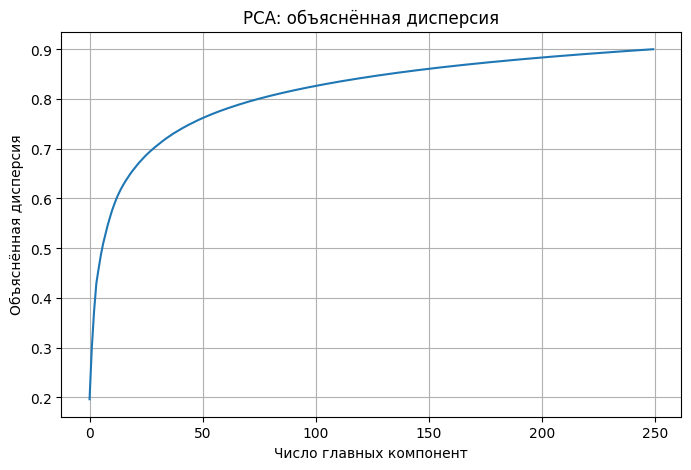

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Обучаем PCA, сохраняя 90% объяснённой дисперсии
pca = PCA(n_components=0.9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Число компонент PCA: {pca.n_components_}")

# График объяснённой дисперсии
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Число главных компонент")
plt.ylabel("Объяснённая дисперсия")
plt.title("PCA: объяснённая дисперсия")
plt.grid()
plt.show()

10 компонент → Accuracy: 0.5600
20 компонент → Accuracy: 0.5825
30 компонент → Accuracy: 0.6000
40 компонент → Accuracy: 0.5750
50 компонент → Accuracy: 0.5750
60 компонент → Accuracy: 0.5725
70 компонент → Accuracy: 0.5800
80 компонент → Accuracy: 0.5650
90 компонент → Accuracy: 0.5650
100 компонент → Accuracy: 0.5725
110 компонент → Accuracy: 0.5850
120 компонент → Accuracy: 0.5775
130 компонент → Accuracy: 0.5825
140 компонент → Accuracy: 0.5750
150 компонент → Accuracy: 0.5925
160 компонент → Accuracy: 0.5725
170 компонент → Accuracy: 0.6025
180 компонент → Accuracy: 0.5650
190 компонент → Accuracy: 0.5800
200 компонент → Accuracy: 0.5975
210 компонент → Accuracy: 0.5700
220 компонент → Accuracy: 0.5650
230 компонент → Accuracy: 0.5575
240 компонент → Accuracy: 0.5525
250 компонент → Accuracy: 0.5650
260 компонент → Accuracy: 0.5675
270 компонент → Accuracy: 0.5450
280 компонент → Accuracy: 0.5650
290 компонент → Accuracy: 0.5700
300 компонент → Accuracy: 0.5700
310 компонент → Acc

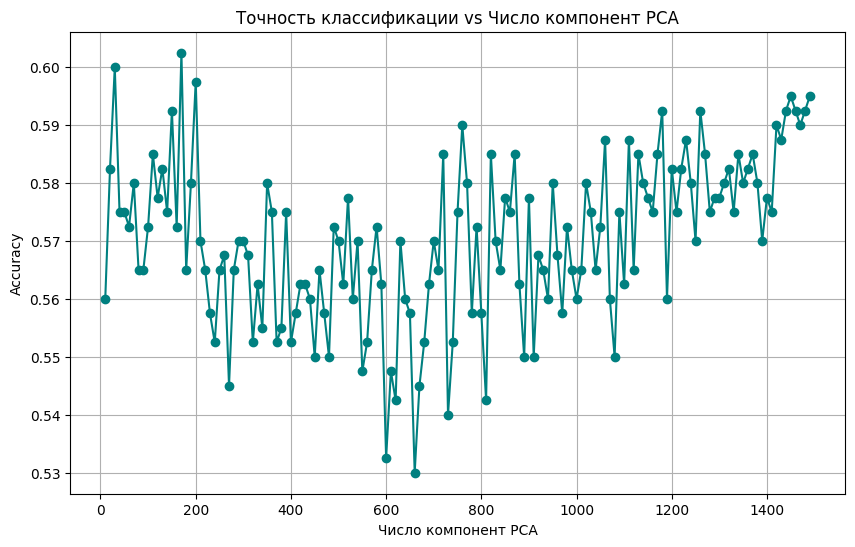

In [6]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Диапазон числа компонент для тестирования
components_range = np.arange(10, 1500, 10)
accuracies = []

for n_comp in components_range:
    # Применяем PCA с текущим числом компонент
    pca_small = PCA(n_components=n_comp)
    X_train_small = pca_small.fit_transform(X_train)
    X_test_small = pca_small.transform(X_test)

    # Обучаем модель
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_small, y_train)

    # Считаем точность
    preds = model.predict(X_test_small)
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)

    print(f"{n_comp} компонент → Accuracy: {acc:.4f}")

# Рисуем график
plt.figure(figsize=(10, 6))
plt.plot(components_range, accuracies, marker='o', color='teal')
plt.xlabel("Число компонент PCA")
plt.ylabel("Accuracy")
plt.title("Точность классификации vs Число компонент PCA")
plt.grid(True)
plt.show()

Общая тенденция:
1) В начале (малое число компонент) точность может быть низкой, так как модель теряет важную информацию.
2) С ростом числа компонент точность обычно увеличивается, так как модель получает больше информации для обучения.
3) Однако, начиная с некоторого порога, точность может стабилизироваться или даже немного снижаться:
Это связано с тем, что добавление новых компонент начинает включать шумы или менее значимые признаки, которые не улучшают качество модели. Тем не менее, в последней трети графика видна стабилизация и улучшение результатов.

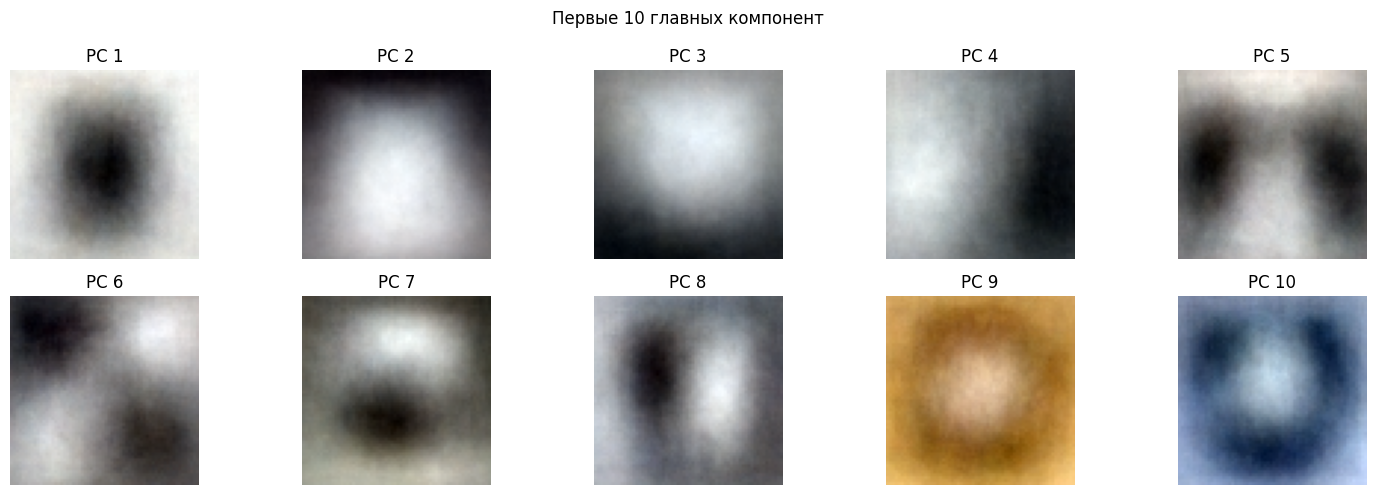

In [7]:
import matplotlib.pyplot as plt

# Берём первые 10 компонент
components = pca.components_[:10]

# Визуализируем их как изображения
plt.figure(figsize=(15, 5))
for i, comp in enumerate(components):
    # Преобразуем в изображение 64x64x3
    comp_image = comp.reshape(64, 64, 3)
    
    # Нормализуем значения для отображения
    comp_image = (comp_image - comp_image.min()) / (comp_image.max() - comp_image.min())

    plt.subplot(2, 5, i + 1)
    plt.imshow(comp_image)
    plt.title(f"PC {i+1}")
    plt.axis('off')

plt.suptitle("Первые 10 главных компонент")
plt.tight_layout()
plt.show()

### Далее интересная часть - сравнение влияния РСА на разные алгоритмы

In [8]:
from sklearn.decomposition import PCA

# Применяем PCA с 100 компонентами
pca = PCA(n_components=230)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Размерность данных после PCA: {X_train_pca.shape}")

Размерность данных после PCA: (1600, 230)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Список моделей
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=50)
}

results = []

print("Результаты без PCA:")
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results.append((name, acc, "Without PCA"))
    print(f"{name}: {acc:.4f}")

print("\nРезультаты с PCA:")
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    preds = model.predict(X_test_pca)
    acc = accuracy_score(y_test, preds)
    results.append((name, acc, "With PCA"))
    print(f"{name}: {acc:.4f}")

Результаты без PCA:
Logistic Regression: 0.5950
Decision Tree: 0.5800
Random Forest: 0.6375

Результаты с PCA:
Logistic Regression: 0.5775
Decision Tree: 0.5250
Random Forest: 0.5475


C:\Users\taifun\AppData\Local\Temp\ipykernel_4752\2665522432.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Model", y="Accuracy", hue="PCA", data=df_results, ci=None)


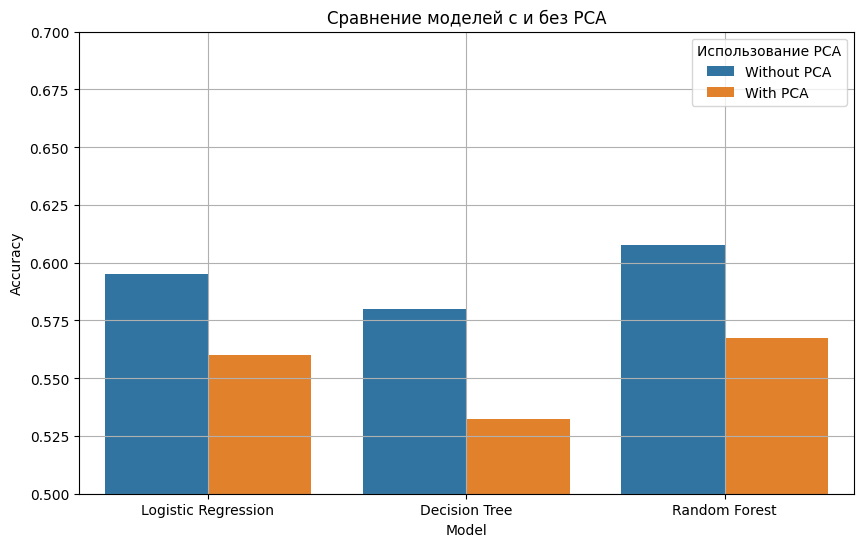

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Преобразуем результаты в DataFrame
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "PCA"])

# Строим график
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", hue="PCA", data=df_results, ci=None)
plt.title("Сравнение моделей с и без PCA")
plt.ylabel("Accuracy")
plt.legend(title="Использование PCA")
plt.ylim(0.5, 0.7)
plt.grid(True)
plt.show()

### результаты ухудшились, но не сильно, надо отдельно изучить подробнее каждый алгоритм

Тестирую 10 компонент...
Тестирую 60 компонент...
Тестирую 110 компонент...
Тестирую 160 компонент...
Тестирую 210 компонент...
Тестирую 260 компонент...
Тестирую 310 компонент...
Тестирую 360 компонент...
Тестирую 410 компонент...
Тестирую 460 компонент...


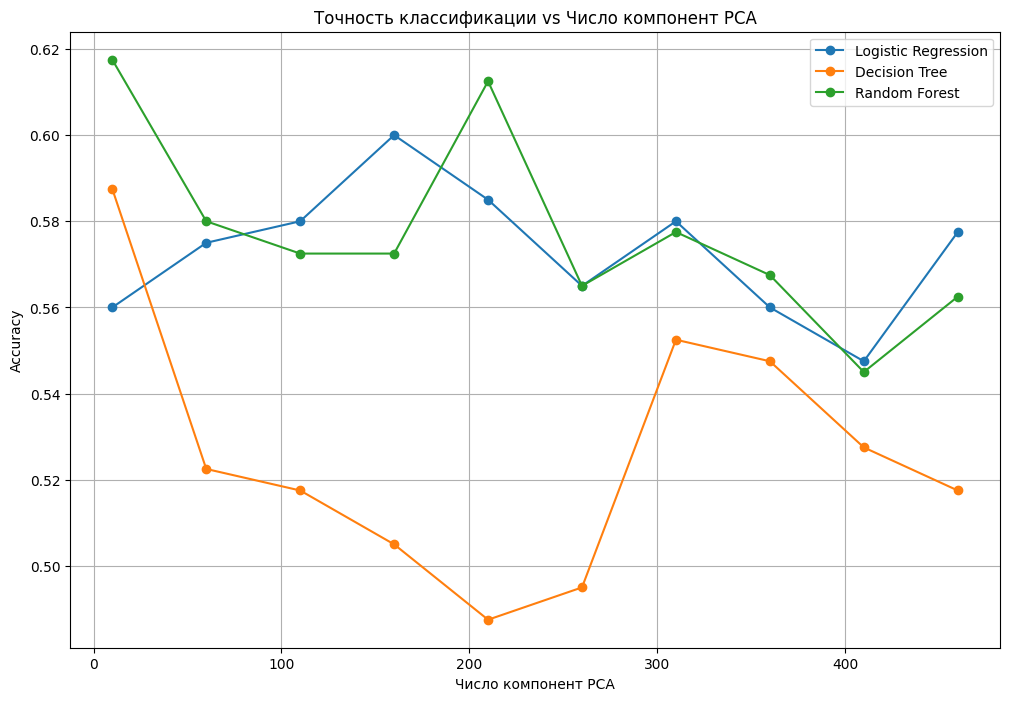

In [36]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Диапазон числа компонент
components_range = np.arange(10, 501, 50)

# Список моделей
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=50)
}

# Храним результаты
results = {name: [] for name in models.keys()}

# Тестируем разные числа компонент
for n_comp in components_range:
    print(f"Тестирую {n_comp} компонент...")
    
    # Применяем PCA
    pca = PCA(n_components=n_comp)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    # Обучаем и оцениваем каждую модель
    for name, model in models.items():
        model.fit(X_train_pca, y_train)
        preds = model.predict(X_test_pca)
        acc = accuracy_score(y_test, preds)
        results[name].append(acc)

# График зависимости точности от числа компонент
plt.figure(figsize=(12, 8))
for name in models.keys():
    plt.plot(components_range, results[name], marker='o', label=name)
plt.xlabel("Число компонент PCA")
plt.ylabel("Accuracy")
plt.title("Точность классификации vs Число компонент PCA")
plt.legend()
plt.grid(True)
plt.show()

Обработка 10 компонент...
Обработка 20 компонент...
Обработка 30 компонент...
Обработка 40 компонент...
Обработка 50 компонент...
Обработка 60 компонент...
Обработка 70 компонент...
Обработка 80 компонент...
Обработка 90 компонент...
Обработка 100 компонент...
Обработка 110 компонент...
Обработка 120 компонент...
Обработка 130 компонент...
Обработка 140 компонент...
Обработка 150 компонент...
Обработка 160 компонент...
Обработка 170 компонент...
Обработка 180 компонент...
Обработка 190 компонент...
Обработка 200 компонент...
Обработка 210 компонент...
Обработка 220 компонент...
Обработка 230 компонент...
Обработка 240 компонент...
Обработка 250 компонент...
Обработка 260 компонент...
Обработка 270 компонент...
Обработка 280 компонент...
Обработка 290 компонент...
Обработка 300 компонент...
Обработка 310 компонент...
Обработка 320 компонент...
Обработка 330 компонент...
Обработка 340 компонент...
Обработка 350 компонент...
Обработка 360 компонент...
Обработка 370 компонент...
Обработка 

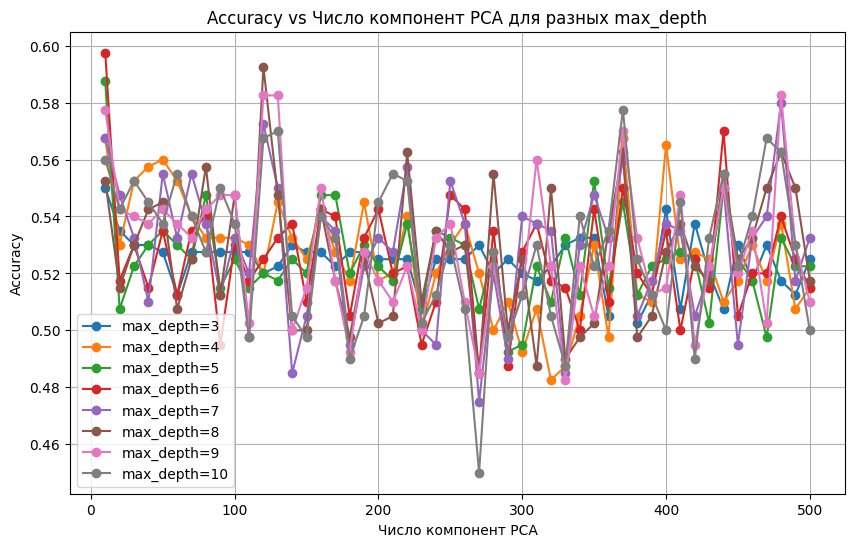

In [11]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Диапазоны для перебора
components_range = np.arange(10, 501, 10)   # число компонент PCA
depths = [3, 4, 5, 6, 7, 8, 9, 10]                     # глубина дерева

# Храним результаты
results = np.zeros((len(components_range), len(depths)))

# Перебираем все комбинации
for i, n_comp in enumerate(components_range):
    print(f"Обработка {n_comp} компонент...")
    
    # Применяем PCA
    pca = PCA(n_components=n_comp)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    for j, depth in enumerate(depths):
        # Обучаем дерево
        model = DecisionTreeClassifier(max_depth=depth, random_state=42)
        model.fit(X_train_pca, y_train)
        
        # Оцениваем
        preds = model.predict(X_test_pca)
        acc = accuracy_score(y_test, preds)
        results[i, j] = acc

# Визуализация
plt.figure(figsize=(10, 6))
for j, depth in enumerate(depths):
    plt.plot(components_range, results[:, j], marker='o', label=f"max_depth={depth}")

plt.title("Accuracy vs Число компонент PCA для разных max_depth")
plt.xlabel("Число компонент PCA")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

Обработка 10 компонент...
Обработка 20 компонент...
Обработка 30 компонент...
Обработка 40 компонент...
Обработка 50 компонент...
Обработка 60 компонент...
Обработка 70 компонент...
Обработка 80 компонент...
Обработка 90 компонент...
Обработка 100 компонент...
Обработка 110 компонент...
Обработка 120 компонент...
Обработка 130 компонент...
Обработка 140 компонент...
Обработка 150 компонент...
Обработка 160 компонент...
Обработка 170 компонент...
Обработка 180 компонент...
Обработка 190 компонент...
Обработка 200 компонент...
Обработка 210 компонент...
Обработка 220 компонент...
Обработка 230 компонент...
Обработка 240 компонент...
Обработка 250 компонент...
Обработка 260 компонент...
Обработка 270 компонент...
Обработка 280 компонент...
Обработка 290 компонент...
Обработка 300 компонент...
Обработка 310 компонент...
Обработка 320 компонент...
Обработка 330 компонент...
Обработка 340 компонент...
Обработка 350 компонент...
Обработка 360 компонент...
Обработка 370 компонент...
Обработка 

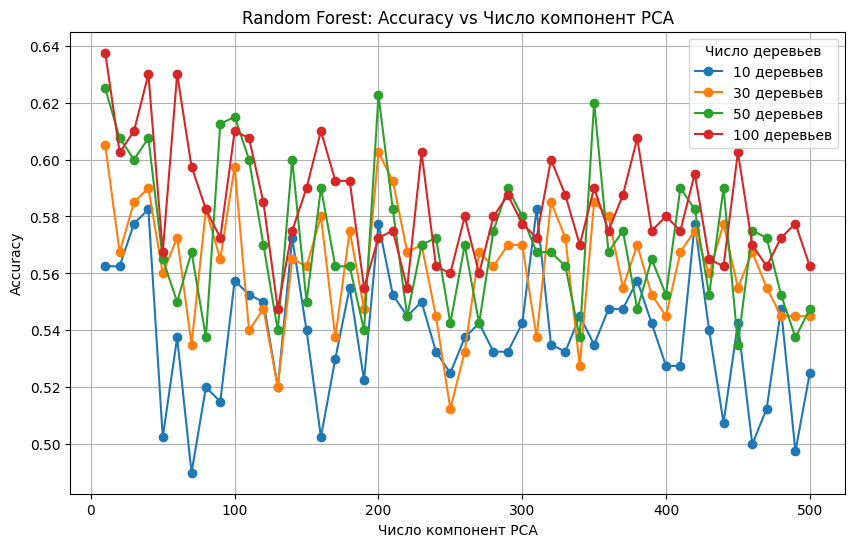

In [12]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Диапазоны для перебора
components_range = np.arange(10, 501, 10)     # число компонент PCA
n_estimators_list = [10, 30, 50, 100]         # число деревьев

# Храним результаты
results = np.zeros((len(components_range), len(n_estimators_list)))

# Перебираем все комбинации
for i, n_comp in enumerate(components_range):
    print(f"Обработка {n_comp} компонент...")
    
    # Применяем PCA
    pca = PCA(n_components=n_comp)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    for j, n_trees in enumerate(n_estimators_list):
        # Обучаем Random Forest
        model = RandomForestClassifier(n_estimators=n_trees, random_state=42)
        model.fit(X_train_pca, y_train)
        
        # Оцениваем
        preds = model.predict(X_test_pca)
        acc = accuracy_score(y_test, preds)
        results[i, j] = acc

# Визуализация
plt.figure(figsize=(10, 6))
for j, n_trees in enumerate(n_estimators_list):
    plt.plot(components_range, results[:, j], marker='o', label=f"{n_trees} деревьев")

plt.title("Random Forest: Accuracy vs Число компонент PCA")
plt.xlabel("Число компонент PCA")
plt.ylabel("Accuracy")
plt.legend(title="Число деревьев")
plt.grid(True)
plt.show()

Обработка 10 компонент...
Обработка 20 компонент...
Обработка 30 компонент...
Обработка 40 компонент...
Обработка 50 компонент...
Обработка 60 компонент...
Обработка 70 компонент...
Обработка 80 компонент...
Обработка 90 компонент...
Обработка 100 компонент...
Обработка 110 компонент...
Обработка 120 компонент...
Обработка 130 компонент...
Обработка 140 компонент...
Обработка 150 компонент...
Обработка 160 компонент...
Обработка 170 компонент...
Обработка 180 компонент...
Обработка 190 компонент...
Обработка 200 компонент...
Обработка 210 компонент...
Обработка 220 компонент...
Обработка 230 компонент...
Обработка 240 компонент...
Обработка 250 компонент...
Обработка 260 компонент...
Обработка 270 компонент...
Обработка 280 компонент...
Обработка 290 компонент...
Обработка 300 компонент...
Обработка 310 компонент...
Обработка 320 компонент...
Обработка 330 компонент...
Обработка 340 компонент...
Обработка 350 компонент...
Обработка 360 компонент...
Обработка 370 компонент...
Обработка 

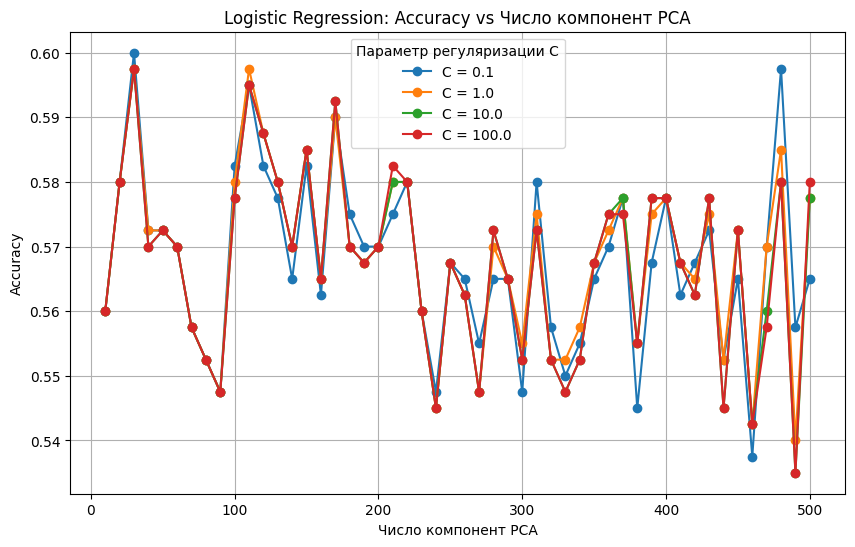

In [13]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Диапазоны для перебора
components_range = np.arange(10, 501, 10)   # число компонент PCA
C_values = [0.1, 1.0, 10.0, 100.0]         # параметр регуляризации

# Храним результаты
results = np.zeros((len(components_range), len(C_values)))

# Перебираем все комбинации
for i, n_comp in enumerate(components_range):
    print(f"Обработка {n_comp} компонент...")
    
    # Применяем PCA
    pca = PCA(n_components=n_comp)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    for j, C in enumerate(C_values):
        # Обучаем модель с разной регуляризацией
        model = LogisticRegression(max_iter=1000, C=C, solver='liblinear')
        model.fit(X_train_pca, y_train)
        
        # Оцениваем
        preds = model.predict(X_test_pca)
        acc = accuracy_score(y_test, preds)
        results[i, j] = acc

# Визуализация
plt.figure(figsize=(10, 6))
for j, C in enumerate(C_values):
    plt.plot(components_range, results[:, j], marker='o', label=f"C = {C}")

plt.title("Logistic Regression: Accuracy vs Число компонент PCA")
plt.xlabel("Число компонент PCA")
plt.ylabel("Accuracy")
plt.legend(title="Параметр регуляризации C")
plt.grid(True)
plt.show()